## RAG Label Comparison

In [16]:
import pandas as pd
import numpy as np


In [17]:
def replace_with_value(value):
    if value.startswith('Balanced Fund'):
        return 2
    elif value.startswith('Fixed Income'):
        return 1
    elif value.startswith('Equity Long Only'):
        return 0
    else:
        return np.nan
    return value

In [18]:
df_RAG = pd.read_csv("df_RAG_all.csv")
df_RAG

,fund_name,Predicted investment strategy,investment strategy evidence,source meta data
0,AB Arizona Portfolio,Fixed Income Long Only (Low Risk),AB Arizona Portfolio\n\n<head_breaker>\n\nAB A...,{'source': 'MutualFundSummary/AB Arizona Portf...
1,AB Asia ex-Japan Equity Portfolio,Equity Long Only (Low Risk),AB Asia ex\n\nJapan Equity Portfolio\n\n<head_...,{'source': 'MutualFundSummary/AB Asia ex-Japan...
2,AB Credit Long/Short Portfolio,Long Short Funds (High Risk),AB Credit Long/Short Portfolio\n\n<head_breake...,{'source': 'MutualFundSummary/AB Credit LongSh...
3,AB Balanced Wealth Strategy Portfolio,Balanced Fund (Low Risk),AB Balanced Wealth Strategy Portfolio <head_br...,{'source': 'MutualFundSummary/AB Balanced Weal...
4,AB Bond Inflation Strategy,Fixed Income Long Only (Low Risk),AB Bond Inflation Strategy\n\n<head_breaker>\n...,{'source': 'MutualFundSummary/AB Bond Inflatio...
...,...,...,...,...
540,Variable Portfolio - Victory Sycamore Establis...,Equity Long Only (Low Risk),Variable Portfolio - Victory Sycamore Establis...,{'source': 'MutualFundSummary/Variable Portfol...
541,Variable Portfolio - TCW Core Plus Bond Fund,Fixed Income Long Only (Low Risk),Variable Portfolio - TCW Core Plus Bond Fund <...,{'source': 'MutualFundSummary/Variable Portfol...
542,Western Asset Intermediate Maturity New York M...,Fixed Income Long Only (Low Risk),The fund may also invest in securities of othe...,{'source': 'MutualFundSummary/Western Asset In...
543,Western Asset Massachusetts Municipals Fund,Fixed Income Long Only (Low Risk),The fund may also engage in a variety of trans...,{'source': 'MutualFundSummary/Western Asset Ma...


In [19]:
df = pd.read_csv("MutualFundLabels.csv")
df

,id,fund_name,Performance fee?,Ivestment Strategy,Leverage?,Portfolio composition,Concentration
0,0000051931-18-000151,American Funds College 2018 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified
1,0000051931-18-000151,American Funds College 2021 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified
2,0000051931-18-000151,American Funds College 2024 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified
3,0000051931-18-000151,American Funds College 2027 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified
4,0000051931-18-000151,American Funds College 2030 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified
...,...,...,...,...,...,...,...
462,0001710607-18-000172,American Century Diversified Corporate Bond ETF,NaN,Fixed Income Long Only (Low Risk),Yes,Investment grade securities,Diversified
463,0001710607-18-000172,American Century Diversified Municipal Bond ETF,NaN,Fixed Income Long Only (Low Risk),No,Investment grade securities,Diversified
464,0001710607-18-000172,American Century Quality Diversified Internati...,NaN,Equity Long Only (Low Risk),Yes,Sub-investment grade securities or emerging ma...,Diversified
465,0001710607-18-000172,American Century STOXX U.S. Quality Growth ETF,NaN,Equity Long Only (Low Risk),Yes,Listed Equities,Diversified


In [20]:
df_RAG['Prediction'] = df_RAG['Predicted investment strategy'].apply(replace_with_value)
df['Ivestment_Strategy_label'] = df['Ivestment Strategy'].apply(replace_with_value)

In [21]:
df_RAG

,fund_name,Predicted investment strategy,investment strategy evidence,source meta data,Prediction
0,AB Arizona Portfolio,Fixed Income Long Only (Low Risk),AB Arizona Portfolio\n\n<head_breaker>\n\nAB A...,{'source': 'MutualFundSummary/AB Arizona Portf...,1.0
1,AB Asia ex-Japan Equity Portfolio,Equity Long Only (Low Risk),AB Asia ex\n\nJapan Equity Portfolio\n\n<head_...,{'source': 'MutualFundSummary/AB Asia ex-Japan...,0.0
2,AB Credit Long/Short Portfolio,Long Short Funds (High Risk),AB Credit Long/Short Portfolio\n\n<head_breake...,{'source': 'MutualFundSummary/AB Credit LongSh...,NaN
3,AB Balanced Wealth Strategy Portfolio,Balanced Fund (Low Risk),AB Balanced Wealth Strategy Portfolio <head_br...,{'source': 'MutualFundSummary/AB Balanced Weal...,2.0
4,AB Bond Inflation Strategy,Fixed Income Long Only (Low Risk),AB Bond Inflation Strategy\n\n<head_breaker>\n...,{'source': 'MutualFundSummary/AB Bond Inflatio...,1.0
...,...,...,...,...,...
540,Variable Portfolio - Victory Sycamore Establis...,Equity Long Only (Low Risk),Variable Portfolio - Victory Sycamore Establis...,{'source': 'MutualFundSummary/Variable Portfol...,0.0
541,Variable Portfolio - TCW Core Plus Bond Fund,Fixed Income Long Only (Low Risk),Variable Portfolio - TCW Core Plus Bond Fund <...,{'source': 'MutualFundSummary/Variable Portfol...,1.0
542,Western Asset Intermediate Maturity New York M...,Fixed Income Long Only (Low Risk),The fund may also invest in securities of othe...,{'source': 'MutualFundSummary/Western Asset In...,1.0
543,Western Asset Massachusetts Municipals Fund,Fixed Income Long Only (Low Risk),The fund may also engage in a variety of trans...,{'source': 'MutualFundSummary/Western Asset Ma...,1.0


In [22]:
df

,id,fund_name,Performance fee?,Ivestment Strategy,Leverage?,Portfolio composition,Concentration,Ivestment_Strategy_label
0,0000051931-18-000151,American Funds College 2018 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0
1,0000051931-18-000151,American Funds College 2021 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0
2,0000051931-18-000151,American Funds College 2024 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0
3,0000051931-18-000151,American Funds College 2027 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0
4,0000051931-18-000151,American Funds College 2030 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0
...,...,...,...,...,...,...,...,...
462,0001710607-18-000172,American Century Diversified Corporate Bond ETF,NaN,Fixed Income Long Only (Low Risk),Yes,Investment grade securities,Diversified,1.0
463,0001710607-18-000172,American Century Diversified Municipal Bond ETF,NaN,Fixed Income Long Only (Low Risk),No,Investment grade securities,Diversified,1.0
464,0001710607-18-000172,American Century Quality Diversified Internati...,NaN,Equity Long Only (Low Risk),Yes,Sub-investment grade securities or emerging ma...,Diversified,0.0
465,0001710607-18-000172,American Century STOXX U.S. Quality Growth ETF,NaN,Equity Long Only (Low Risk),Yes,Listed Equities,Diversified,0.0


In [23]:
df_merged = df.merge(df_RAG, on='fund_name', how='inner')
df_merged

,id,fund_name,Performance fee?,Ivestment Strategy,Leverage?,Portfolio composition,Concentration,Ivestment_Strategy_label,Predicted investment strategy,investment strategy evidence,source meta data,Prediction
0,0000051931-18-000151,American Funds College 2018 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2018 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
1,0000051931-18-000151,American Funds College 2021 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2021 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
2,0000051931-18-000151,American Funds College 2024 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2024 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
3,0000051931-18-000151,American Funds College 2027 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2027 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
4,0000051931-18-000151,American Funds College 2030 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2030 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
461,0001710607-18-000172,American Century Diversified Corporate Bond ETF,NaN,Fixed Income Long Only (Low Risk),Yes,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Corporate Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
462,0001710607-18-000172,American Century Diversified Municipal Bond ETF,NaN,Fixed Income Long Only (Low Risk),No,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Municipal Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
463,0001710607-18-000172,American Century Quality Diversified Internati...,NaN,Equity Long Only (Low Risk),Yes,Sub-investment grade securities or emerging ma...,Diversified,0.0,Equity Long Only (Low Risk),American Century Quality Diversified Internati...,{'source': 'MutualFundSummary/American Century...,0.0
464,0001710607-18-000172,American Century STOXX U.S. Quality Growth ETF,NaN,Equity Long Only (Low Risk),Yes,Listed Equities,Diversified,0.0,Equity Long Only (Low Risk),American Century STOXX U.S. Quality Growth ETF...,{'source': 'MutualFundSummary/American Century...,0.0


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
df_summary = df_merged.dropna(subset = ['Ivestment_Strategy_label','Prediction'])

In [35]:
df_summary

,id,fund_name,Performance fee?,Ivestment Strategy,Leverage?,Portfolio composition,Concentration,Ivestment_Strategy_label,Predicted investment strategy,investment strategy evidence,source meta data,Prediction
0,0000051931-18-000151,American Funds College 2018 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2018 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
1,0000051931-18-000151,American Funds College 2021 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2021 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
2,0000051931-18-000151,American Funds College 2024 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2024 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
3,0000051931-18-000151,American Funds College 2027 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2027 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
4,0000051931-18-000151,American Funds College 2030 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2030 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
461,0001710607-18-000172,American Century Diversified Corporate Bond ETF,NaN,Fixed Income Long Only (Low Risk),Yes,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Corporate Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
462,0001710607-18-000172,American Century Diversified Municipal Bond ETF,NaN,Fixed Income Long Only (Low Risk),No,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Municipal Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
463,0001710607-18-000172,American Century Quality Diversified Internati...,NaN,Equity Long Only (Low Risk),Yes,Sub-investment grade securities or emerging ma...,Diversified,0.0,Equity Long Only (Low Risk),American Century Quality Diversified Internati...,{'source': 'MutualFundSummary/American Century...,0.0
464,0001710607-18-000172,American Century STOXX U.S. Quality Growth ETF,NaN,Equity Long Only (Low Risk),Yes,Listed Equities,Diversified,0.0,Equity Long Only (Low Risk),American Century STOXX U.S. Quality Growth ETF...,{'source': 'MutualFundSummary/American Century...,0.0


In [36]:
cm = confusion_matrix(df_summary['Ivestment_Strategy_label'], df_summary['Prediction'])
print(cm)

[[205   1  16]
 [  8 118   3]
 [  4   2  75]]


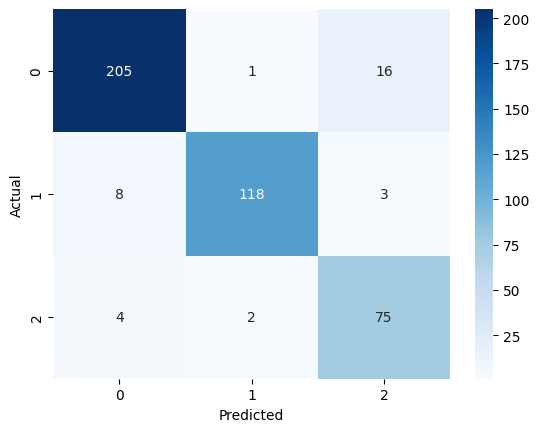

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
df_comparison = df_summary[['fund_name', 'Ivestment_Strategy_label','Prediction','investment strategy evidence','source meta data']]

In [51]:
df_comparison = df_comparison[df_comparison['Ivestment_Strategy_label'] != df_comparison['Prediction']]

In [52]:
df_comparison.shape

(34, 5)

In [56]:
#Pick several funds where the labels from these two sources are not the same
df_comparison_sample = df_comparison.sample(3,random_state=815)
df_comparison_sample

,fund_name,Ivestment_Strategy_label,Prediction,investment strategy evidence,source meta data
17,Global Growth and Income Fund,0.0,2.0,Global Growth and Income Fund <head_breaker>\n...,{'source': 'MutualFundSummary/Global Growth an...
221,Janus Henderson Global Research Portfolio,1.0,0.0,Janus Henderson Global Research Portfolio <hea...,{'source': 'MutualFundSummary/Janus Henderson ...
23,International Growth and Income Fund,0.0,2.0,International Growth and Income Fund <head_bre...,{'source': 'MutualFundSummary/International Gr...


In [62]:
df_comparison_sample['source meta data'].iloc[0], df_comparison_sample['source meta data'].iloc[1],\
df_comparison_sample['source meta data'].iloc[2]

("{'source': 'MutualFundSummary/Global Growth and Income Fund.txt'}",
 "{'source': 'MutualFundSummary/Janus Henderson Global Research Portfolio.txt'}",
 "{'source': 'MutualFundSummary/International Growth and Income Fund.txt'}")

In [59]:
df_comparison_sample['investment strategy evidence'].iloc[0]

'Global Growth and Income Fund <head_breaker>\n\nGlobal Growth and Income Fund\n\nInvestment objective The fund’s investment objective is to provide long-term growth of capital while providing current income.\n\nFees and expenses of the fund This table describes the fees and expenses that you may pay if you buy and hold an interest in Class 1 shares of the fund. It does not reflect insurance contract fees and expenses. If insurance contract fees and expenses were reflected, expenses shown would be higher.\n\nAnnual fund operating expenses (expenses that you pay each year as a percentage of the value of your investment)\tClass 1 Management fee\t0.59% Other expenses\t0.04 Total annual fund operating expenses\t0.63 Example This example is intended to help you compare the cost of investing in Class 1 shares of the fund with the cost of investing in other mutual funds.'

In [60]:
df_comparison_sample['investment strategy evidence'].iloc[1]

'Janus Henderson Global Research Portfolio <head_breaker>\n\nJanus Henderson Global Research Portfolio Ticker:\tJAWGX\tInstitutional Shares'

In [61]:
df_comparison_sample['investment strategy evidence'].iloc[2]

'International Growth and Income Fund <head_breaker>\n\nInternational Growth and Income Fund\n\nInvestment objective The fund’s investment objective is to provide long-term growth of capital while providing current income.\n\nFees and expenses of the fund This table describes the fees and expenses that you may pay if you buy and hold an interest in Class 1 shares of the fund. It does not reflect insurance contract fees and expenses. If insurance contract fees and expenses were reflected, expenses shown would be higher.\n\nAnnual fund operating expenses (expenses that you pay each year as a percentage of the value of your investment)\tClass 1 Management fee\t0.61% Other expenses\t0.04 Total annual fund operating expenses\t0.65 Example This example is intended to help you compare the cost of investing in Class 1 shares of the fund with the cost of investing in other mutual funds.'

Comment: First of all, our RAG process was able to retrieve appropriate txt files. 
Looking at the first fund (Global Growth and Income Fund), the evidence provided by the RAG process shows that "the fund’s investment objective is to provide long-term growth of capital while providing current income". It also mentioned interest. From those evidence, we can say this fund is using equity and fixed income, we believe the answer provided by RAG is more accurate. For second fund (Janus Henderson Global Research Portfolio), it looks the evidence provided from RAG is nothing t do with investment strategy, so we think the labled result is more accurate. Lastly, for International Growth and Income Fund, the fund's objective is similar to Global Growth and Income Fund. From the evidence we have provided, we conclude this fund trade multiple asset, including fixed income and equity, so the pridiction is more accurate

## Train Classification Algorithm